<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Exercise 12: Creating Features with Transactional and Time Series Data </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Objectives

Throughout this module, we've discussed multiple feature engineering techniques that we can use to engineer variables in tabular data, where each observation is independent and shows only 1 value for each available variable. However, data can also contain multiple values that are not independent for each entity. For example, there can be multiple records for each customer with the details of the customer's transactions within our organization, such as purchases, payments, claims, deposits, and withdrawals. In other cases, the values of the variables may change daily, such as stock prices or energy consumption per household. The first data sources are referred to as transactional data, whereas the second data sources are time series. Time series and transactional data contain time-stamped observations, which means they share a time dimension.

We often create features that aggregate or summarize the information from the historical data points of time series or transactions. For example, we can create features that capture the maximum amount that was spent by the customer in the last week, the number of transactions they made, or the time between transactions. The number of features we can create and the ways in which we can aggregate this information is enormous. 

In this practical, we will discuss the most common ways of creating aggregated views of historical data by using pandas. And we will also point you to other Python libraries that have been devised specifically for analyzing signal complexity.

Pls refer to the `Practical 12.1 - Practical 12.4` in the seperate files for details. 

## Exercise

We will be using US house election data from 1976 to 2018 (https://www.kaggle.com/tunguz/us-elections-dataset) and focus on the Democrat Party records. First, we extract a time series data for each state, i.e. the sum of candidatevotes per year per state. Then we will look at the time series data per state and find all the local maxima and minima for each time series. Finally, we will calculate the mean distance between all the local maxima and minima for each time series/state. 

In [2]:
# import all the required packages

import pandas as pd
import numpy as np

# sklearn preprocess
from sklearn.model_selection import train_test_split

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

In [3]:
# load the dataset and show the info of dataset
data = pd.read_csv('./data/1976-2018-house2.csv', encoding ='Latin-1')
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29636 entries, 0 to 29635
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            29636 non-null  int64 
 1   state           29636 non-null  object
 2   state_po        29636 non-null  object
 3   state_fips      29636 non-null  int64 
 4   state_cen       29636 non-null  int64 
 5   state_ic        29636 non-null  int64 
 6   office          29636 non-null  object
 7   district        29636 non-null  int64 
 8   stage           29606 non-null  object
 9   runoff          20980 non-null  object
 10  special         29636 non-null  bool  
 11  candidate       27516 non-null  object
 12  party           26214 non-null  object
 13  writein         29636 non-null  bool  
 14  mode            29636 non-null  object
 15  candidatevotes  29636 non-null  int64 
 16  totalvotes      29636 non-null  int64 
 17  unofficial      29636 non-null  bool  
 18  versio

In [5]:
# Task 1: take a subset of data with only Democrat Party records
democ = data[data['party'] == 'democrat']
democ.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
6,1976,Alabama,AL,1,63,41,US House,3,gen,False,False,Bill Nichols,democrat,False,total,106935,108048,False,20200424
9,1976,Alabama,AL,1,63,41,US House,4,gen,False,False,Tom Bevill,democrat,False,total,141490,176022,False,20200424
12,1976,Alabama,AL,1,63,41,US House,5,gen,False,False,Ronnie G. Flippo,democrat,False,total,113553,113560,False,20200424


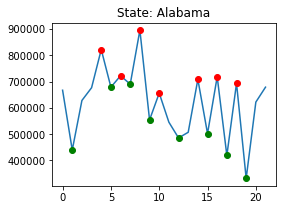

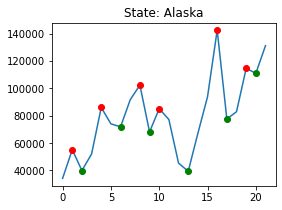

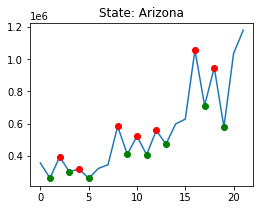

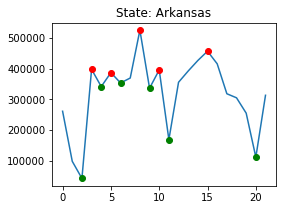

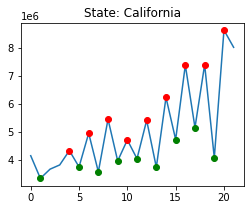

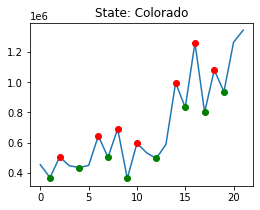

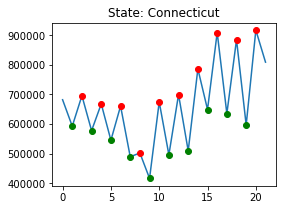

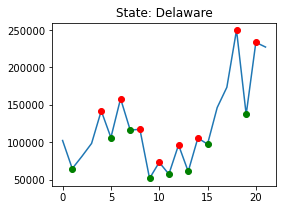

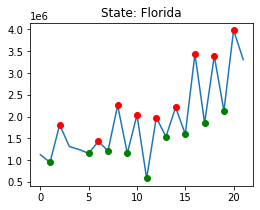

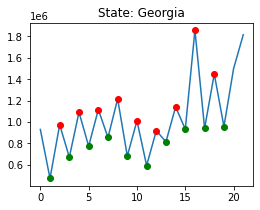

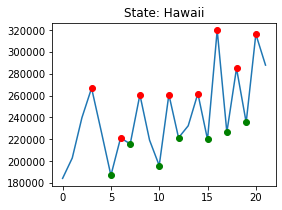

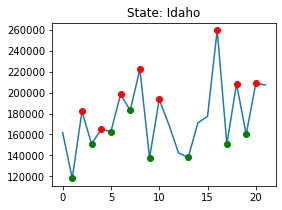

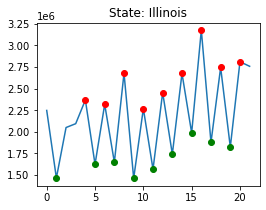

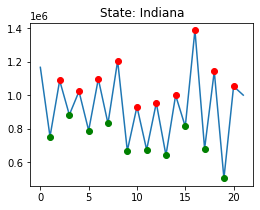

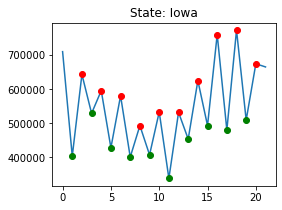

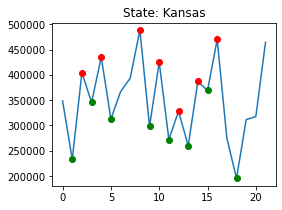

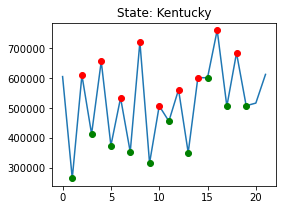

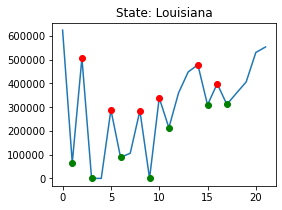

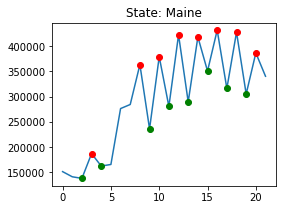

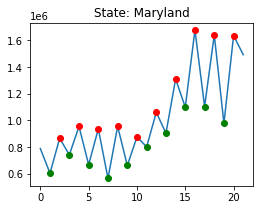

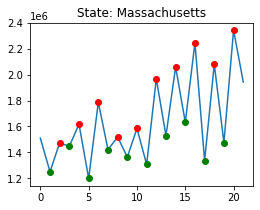

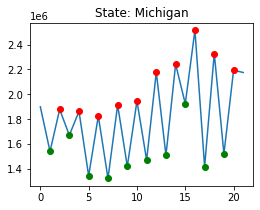

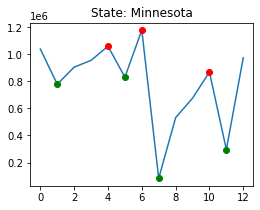

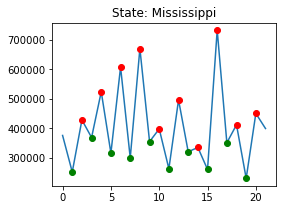

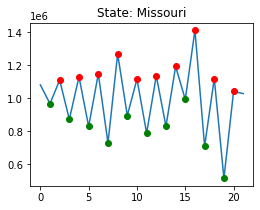

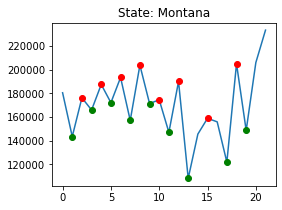

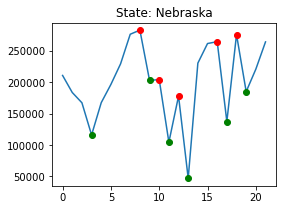

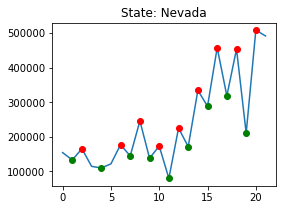

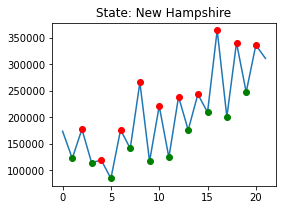

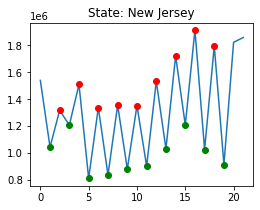

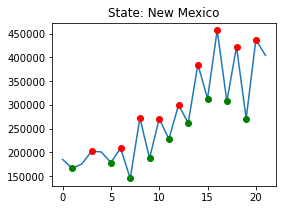

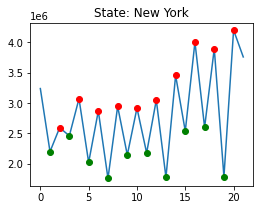

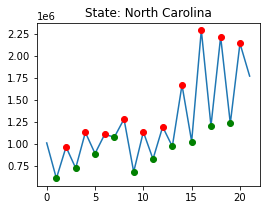

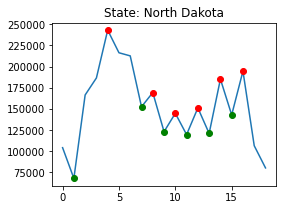

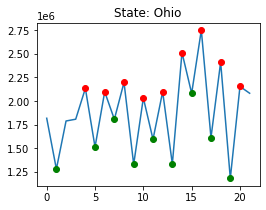

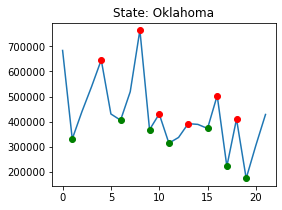

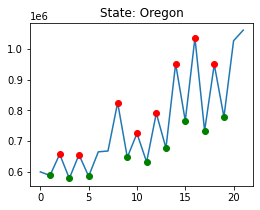

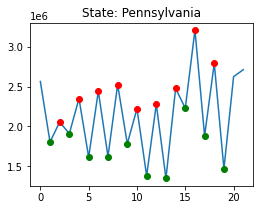

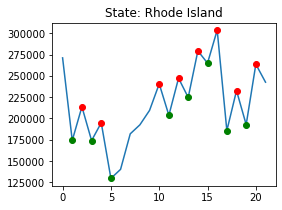

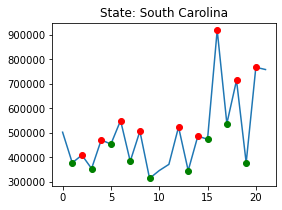

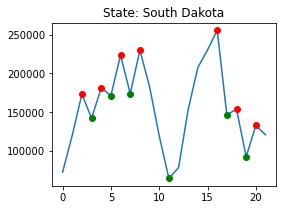

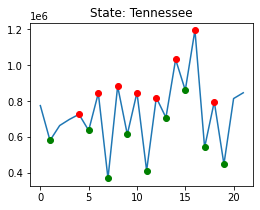

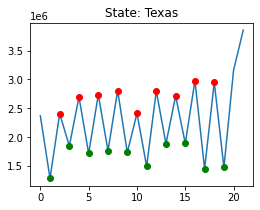

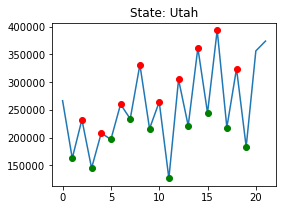

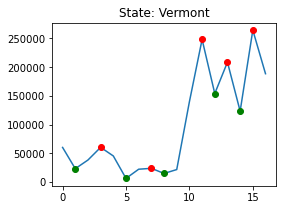

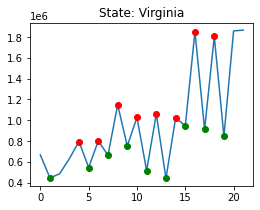

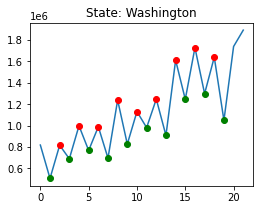

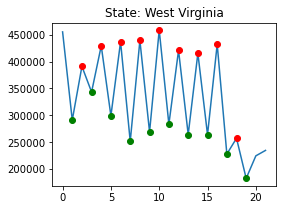

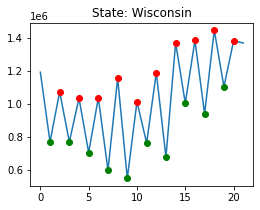

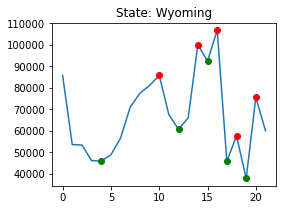

In [6]:
# Task 2: For each state, create a time series data, i.e. the sum of candidatevotes per year
# plot the time series per state and the local maxima for each time series
def find_and_plot_peaks(x, s):
    peaks, _ = find_peaks(x)
    valleys, _ = find_peaks(1/x)
    plt.figure(figsize=(4,3))
    plt.plot(x)
    plt.plot(peaks, x[peaks], "o", color = 'red')
    plt.plot(valleys, x[valleys], "o", color='green')
    plt.title('State: {}'.format(s))
    plt.show()
    
for state in democ['state'].unique():
    tmp = democ[democ['state'] == state]
    tmp = tmp.groupby('year')['candidatevotes'].sum()
    tmp.reset_index(drop = True,inplace = True)
    find_and_plot_peaks(tmp, state)

In [7]:
# Task 3: For each state/time series (i.e. sum of candidatevotes per year), 
# selects the points with peaks and valleys in the series
# and determines the year difference between them.
# finally, returns the mean distance between all local maxima and minima for each state/time series
# This can be a new feature for each state and help to predict the election results and etc.

In [8]:
def find_contents_peaks(x):
    # finds number of local maxima
    peaks, _ = find_peaks(x)
    return (peaks)

def find_contents_valleys(x):
    # finds number of local minima
    valleys, _ = find_peaks(1/x)
    return (valleys)

def concatenate_pav(x):
    # concatenates the indeces of the peaks and valleys
    ids = np.concatenate([find_contents_peaks(x), find_contents_valleys(x)])
    ids.sort()
    return (ids)

def slice_and_measure(x):
    # selects the points with peaks and valleys in the series
    # and determines the hr difference between them.
    # finally, returns the mean distance between
    # all local maxima and minima
    ids = concatenate_pav(x)
    tmp = pd.DataFrame(x.iloc[ids]).reset_index(drop=False)
    t = tmp['year'].diff()
    return t.mean(skipna=True)

In [9]:
for state in democ['state'].unique():
    tmp = democ[democ['state'] == state]
    print(tmp.groupby(['state', 'year'])['candidatevotes'].sum().groupby('state').apply(slice_and_measure))

state
Alabama    2.571429
Name: candidatevotes, dtype: float64
state
Alaska    3.454545
Name: candidatevotes, dtype: float64
state
Arizona    2.571429
Name: candidatevotes, dtype: float64
state
Arkansas    3.6
Name: candidatevotes, dtype: float64
state
California    2.235294
Name: candidatevotes, dtype: float64
state
Colorado    2.571429
Name: candidatevotes, dtype: float64
state
Connecticut    2.0
Name: candidatevotes, dtype: float64
state
Delaware    2.533333
Name: candidatevotes, dtype: float64
state
Florida    2.235294
Name: candidatevotes, dtype: float64
state
Georgia    2.0
Name: candidatevotes, dtype: float64
state
Hawaii    2.428571
Name: candidatevotes, dtype: float64
state
Idaho    2.533333
Name: candidatevotes, dtype: float64
state
Illinois    2.235294
Name: candidatevotes, dtype: float64
state
Indiana    2.0
Name: candidatevotes, dtype: float64
state
Iowa    2.0
Name: candidatevotes, dtype: float64
state
Kansas    2.428571
Name: candidatevotes, dtype: float64
state
Kentucky